Title: Final Project for Stats and Machine Learning\
Date: Jan. 3, 2021\
Author: Edwin Lotero\
Summary: Classification Model using Random Forest Algorithm

## Introduction

This project will look at various factors that may be related to use of mental health services among the population. While causative factors require more complex analysis and study than I will conduct here, statistical models may be employed for identifying individuals in society that may be in need of mental health services  or may require in the future. This report will construct a predictive model for classifying these individuals by their various characteristics using a random forest classification scheme.

## Data Description
The data I analyzed in this report, file name PUF2019_100920, was generated from the results of the 2019 National Survey on Drug Use and Health (NSDUH) which was administered by the Substance Abuse and Mental Health Services Administration (SAMHSA). It is public access and available through the agency's public database website, https://www.datafiles.samhsa.gov/. The purpose of the survey is to college factors relating to the prevalence of substance use and mental health issues among the United States population, and is the 39th in its series. The data set is made up of 2,741 variables and 56,136 observations which include fields such as youth experiences, mental health and substance use history, demographic identifiers, and educational attainment. Each observation is unique.

## Data Source
The data source can be downloaded here for processing: https://www.datafiles.samhsa.gov/dataset/national-survey-drug-use-and-health-2019-nsduh-2019-ds0001

In [25]:
# load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve, f1_score

In [26]:
# load data set
raw_data = pd.read_csv('PUF2019_100920.csv')

C:\Users\elote\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (2576) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## Preprocessing

Being a large data set with a vast number of variables, it was necessary to narrow down to several of interest to the creation of a classification model. These are listed and defined below, and their values are taken from the data set codebook:

### Target variable
The outcome variable selected is AMHTXRC3: Received any mental health treatment within the past year
  * 1 = Yes
  * 2 = No 

### Predictor variables
The features selected are:
* illyr: ANY ILLICIT DRUG - PAST YEAR USE
  * 0 = Did not use in past year
  * 1 = Used in past year
* bngdrkmon: BINGE ALCOHOL USE PAST 30 DAYS
  * 0 = Never/No "Binge" alc use
  * 1 = "Binge" alcohol use
* hvydrkmon: HEAVY ALCOHOL USE PAST 30 DAYS
  * 0 = Never/No heavy alc use
  * 1 = Heavy alcohol use
* snysell: SOLD ILLEGAL DRUGS
  * 1 = 0 times
  * 2 = 1 or 2 times
  * 3 = 3 to 5 times
  * 4 = 6 to 9 times
  * 5 = 10 or more times
* snrlgsvc: AST 12 MOS, HOW MANY RELIG. SERVICES
  * 1 = 0 times
  * 2 = 1 to 2 times
  * 3 = 3 to 5 times
  * 4 = 6 to 24 times
  * 5 = 25 to 52 times
  * 6 = More than 52 times
* snrlgimp: MY RELIGIOUS BELIEFS ARE VERY IMPORTANT
  * 1 = Strongly Disagree
  * 2 = Disagree
  * 3 = Agree
  * 4 = Strongly Agree
* sexident: SEXUAL IDENTITY
  * 1 = Heterosexual, that is, straight.
  * 2 = Lesbian or Gay
  * 3 = Bisexual
* irsex: GENDER
  * 1 = Male
  * 2 = Female
* eduhighcat: EDUCATION CATEGORIES
  * 1 = Less high school
  * 2 = High school grad
  * 3 = Some coll/Assoc Dg
  * 4 = College graduate 
  * 5 = 12 to 17 year olds
* HEALTH2: OVERALL HEALTH
  * 1 = Excellent
  * 2 = Very Good
  * 3 = Good
  * 4 = Fair/Poor
* NEWRACE2: RACE/HISPANICITY
  * 1 = NonHisp White
  * 2 = NonHisp Black/Afr Am
  * 3 = NonHisp Native Am/AK Native
  * 4 = NonHisp Native HI/Other Pac Isl
  * 5 = NonHisp Asian 
  * 6 = NonHisp more than one race
  * 6 = NonHisp more than one race
* CATAG3: AGE CATEGORY
  * 1 = 12-17 Years Old
  * 2 = 18-25 Years Old.
  * 3 = 26-34 Years Old
  * 4 = 35-49 Years Old
  * 5 = 50 or Older
* wrkdpstyr: PAST 12 MONTHS, WORKED AT ANY JOB
  * 1 = Yes
  * 2 = No
* irwrkstat: EMPLOYMENT STATUS
  * 1 = Employed full time 
  * 2 = Employed part time
  * 3 = Unemployed
* income: TOTAL FAMILY INCOME
  * 1 = Less than $20,000
  * 2 = $20,000 - $49,999
  * 3 = $50,000 - $74,999
  * 4 = $75,000 or More
* POVERTY3: POVERTY LVL (% OF US CENSUS POVERTY THRESHOLD)
  * 1 = Living in Poverty
  * 2 = Income Up to 2X Fed Pov Thresh
  * 3 = Income More Than 2X Fed Pov Thresh
* medicare: COVERED BY MEDICARE
  * 1 = Yes
  * 2 = No
* caidchip: COVERED BY MEDICAID/CHIP
  * 1 = Yes
  * 2 = No
* champus: COV BY TRICARE, CHAMPUS, CHAMPVA, VA, MILITARY
  * 1 = Yes
  * 2 = No

Subset the raw data to narrow down to predictors and outcome variable:

In [27]:
# select predictor list
predictor_list = ['AMHTXRC3', 'illyr', 'bngdrkmon', 'hvydrkmon', 'snysell', 'snrlgsvc', 'snrlgimp', 'sexident', 'irsex', 'eduhighcat', 'HEALTH2', 
'NEWRACE2', 'CATAG3', 'wrkdpstyr', 'irwrkstat', 'income', 'POVERTY3', 'medicare', 'caidchip', 'champus']

df1 = raw_data[predictor_list]

Here we do an initial inspection of the working dataframe to notice its structure:

In [28]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56136 entries, 0 to 56135
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   AMHTXRC3    42451 non-null  float64
 1   illyr       56136 non-null  int64  
 2   bngdrkmon   56136 non-null  int64  
 3   hvydrkmon   56136 non-null  int64  
 4   snysell     56136 non-null  int64  
 5   snrlgsvc    56136 non-null  int64  
 6   snrlgimp    56136 non-null  int64  
 7   sexident    56136 non-null  int64  
 8   irsex       56136 non-null  int64  
 9   eduhighcat  56136 non-null  int64  
 10  HEALTH2     56127 non-null  float64
 11  NEWRACE2    56136 non-null  int64  
 12  CATAG3      56136 non-null  int64  
 13  wrkdpstyr   56136 non-null  int64  
 14  irwrkstat   56136 non-null  int64  
 15  income      56136 non-null  int64  
 16  POVERTY3    55609 non-null  float64
 17  medicare    56136 non-null  int64  
 18  caidchip    56136 non-null  int64  
 19  champus     56136 non-nul

Some of the features have multiple levels of category according to the codebook. This includes levels that are not useful to the analysis. The following is one example, followed by the dropping of those levels in the various features:

In [29]:
# check distribution of bad values
df1['snysell'].value_counts()

1     41697
99    13397
2       392
5       270
97      119
3       117
94       63
4        62
98       11
85        8
Name: snysell, dtype: int64

In [30]:
# drop bad data from columns
df1 = df1[df1['snysell'].isin([1, 2, 3, 4, 5])]
df1 = df1[df1['snrlgsvc'].isin([1, 2, 3, 4, 5, 6])]
df1 = df1[df1['snrlgimp'].isin([1, 2, 3, 4])]
df1 = df1[df1['sexident'].isin([1, 2, 3])]
df1 = df1[df1['HEALTH2'].isin([1, 2, 3, 4])]
df1 = df1[df1['irwrkstat'].isin([1, 2, 3])]
df1 = df1[df1['medicare'].isin([1, 2])]
df1 = df1[df1['caidchip'].isin([1, 2])]
df1 = df1[df1['champus'].isin([1, 2])]

We can do another inspection here. It is noticeable that the number of rows has decreased since we have removed bad data, but it also seems like we have null values. We will attend to this next.

In [31]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30229 entries, 0 to 56132
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   AMHTXRC3    30172 non-null  float64
 1   illyr       30229 non-null  int64  
 2   bngdrkmon   30229 non-null  int64  
 3   hvydrkmon   30229 non-null  int64  
 4   snysell     30229 non-null  int64  
 5   snrlgsvc    30229 non-null  int64  
 6   snrlgimp    30229 non-null  int64  
 7   sexident    30229 non-null  int64  
 8   irsex       30229 non-null  int64  
 9   eduhighcat  30229 non-null  int64  
 10  HEALTH2     30229 non-null  float64
 11  NEWRACE2    30229 non-null  int64  
 12  CATAG3      30229 non-null  int64  
 13  wrkdpstyr   30229 non-null  int64  
 14  irwrkstat   30229 non-null  int64  
 15  income      30229 non-null  int64  
 16  POVERTY3    29992 non-null  float64
 17  medicare    30229 non-null  int64  
 18  caidchip    30229 non-null  int64  
 19  champus     30229 non-nul

### Check for null values

Two columns contain null values, or NAs, in the data: AMHTXRC3 and POVERTY3. As they represent a small percentage of the total, we will drop these from the data and observe that the NAs are now gone:

In [32]:
# check for null values
pd.DataFrame(df1.isnull().sum())

,0
AMHTXRC3,57
illyr,0
bngdrkmon,0
hvydrkmon,0
snysell,0
snrlgsvc,0
snrlgimp,0
sexident,0
irsex,0
eduhighcat,0


In [33]:
# drop null values
df1 = df1.dropna()

In [34]:
pd.DataFrame(df1.isnull().sum())

,0
AMHTXRC3,0
illyr,0
bngdrkmon,0
hvydrkmon,0
snysell,0
snrlgsvc,0
snrlgimp,0
sexident,0
irsex,0
eduhighcat,0


## Build the model

### Decision Trees
Decision trees work similarly to how its namesake is structured. We begin with one main branch and then split into sub-branches at each feature in the decision tree. 

### Random Forest Classifier
The random forest classifier operates with an ensemble of decision trees, each sampling a number of features present in a set of predictor variables. Each decision tree then calculates a prediction for the outcome variable and the prediction with the greatest number becomes the model's main prediction. 

The random forest classifier must take the dependent variable as a binary outcome, 0's and 1's; hence, we will recode the values appropriately. Then we prepare the data set for our model by splitting it into a features component and outcome component (X and y). 

In [35]:
df1['AMHTXRC3'].replace({2.0 : 0, 1.0 : 1}, inplace=True)

In [36]:
# split into X and y
X = df1.drop('AMHTXRC3', axis=1)
y = df1.pop('AMHTXRC3')

Encode the variables as 'object' datatype since they are categorical, not numerical, for proper interpretation by the model:

In [37]:
# encode categorical data for predictors
col_names = list(X)

for col in col_names:
    X[col] = X[col].astype('object', copy=False) 

In [38]:
# verify types
X.dtypes

illyr         object
bngdrkmon     object
hvydrkmon     object
snysell       object
snrlgsvc      object
snrlgimp      object
sexident      object
irsex         object
eduhighcat    object
HEALTH2       object
NEWRACE2      object
CATAG3        object
wrkdpstyr     object
irwrkstat     object
income        object
POVERTY3      object
medicare      object
caidchip      object
champus       object
dtype: object

We will create our train/test split using a 80/20 ratio and saving the seed state for reproducibility:

In [39]:
# create train/test split
seed = 10
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

The following code will process the depended variables through a one hot encoding function, splitting up the various levels in each feature to create binary measures. This will ensure proper handling and interpretability for our random forest model. The constructor below takes in both numerical and categorical data types in order to properly do the one hot encoding; however, as our model includes only categorical features, they will all pass into the encoder:

In [40]:
enc_feat = X_train.columns[X_train.dtypes == object].tolist() 

# constructor for handling categorical variables for proper encoding
trans_cols = make_column_transformer(
                        (OneHotEncoder(), enc_feat),
                        remainder = "passthrough"
                        )

Here we define the random forest classifier along with its hyperparameters:

In [41]:
# define random forest classifier object
classr = RandomForestClassifier(
                      min_samples_leaf = 50,
                      n_estimators = 150,
                      bootstrap = True,
                      oob_score = True,
                      n_jobs = -1,
                      random_state = seed,
                      max_features = 'auto')

We will make use of the pipeline feature of sklearn to perform the needed encoding, transformation, and classification of our train/test split data. It is a convenient way to reuse code in a concise manner for when multiple model fittings will be performed. Here we do that and also generate our test predictions for assessing the model performance:

In [42]:
# fit data to model using pipeline function
pipe = make_pipeline(trans_cols, classr)
pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

## Evaluate the model

### Accuracy
Accuracy is defined by the sum of true positives and true negatives divided by the total number of predictions. That is, it quantifies how well the model correctly classifies the test samples. The accuracy_score() function will calculate this value for us:

In [43]:
acc_score = (accuracy_score(y_test, y_pred)) * 100
print("The accuracy of the model is ", acc_score, "%")

The accuracy of the model is  82.65226589466653 %


#### Predict Probabilities and ROC AUC Scores
The predict_proba() function allows us to predict the probability of label 1 for our target variable in the train and test dataframes. In turn, these values will be fed into the roc_auc_score() function to plot the Receiver Operating Characteristic (ROC) score and ROC Area Under Curve (ROC AUC) scores from test and train prediction scores:

In [44]:
prob_train = pipe.predict_proba(X_train)[:,1] 
probs = pipe.predict_proba(X_test)[:, 1]
train_preds = pipe.predict(X_train)

ROC AUC is produced by calulating the rate of true positives versus the rate of false positives at any particular threshold (the x-axis). Threshold means the value at which a prediction is interpreted to be true or not (1 or 0). The closer the ROC AUC scores are to 1.0, the more predictive power the model has:

In [45]:
train_roc_auc = roc_auc_score(y_train, prob_train)
test_roc_auc = roc_auc_score(y_test, probs)

print('Train ROC AUC Score: ', train_roc_auc)
print('Test ROC AUC  Score: ', test_roc_auc)

Train ROC AUC Score:  0.7559188285996282
Test ROC AUC  Score:  0.726123115077153


Next, we plot the ROC against a baseline curve as a visual aid to compare the mode's performance. As a review, the recall of the model, or sensitivity, is defined as number of true positives divided by the sum of true positives and false negatives. Precision, on the other hand, is defined as the number of true positives divided by the sum of true positives and false positives. These values are fed into the mod_eval() function below to generate the curve.

The baseline curve shown in blue represents a random classifier that cannot tell the difference between the two classes of the outcome variable and is shown as reference. We can see that the model is closer to 1.0 than baseline, (about 0.73 for the test data), indicating a modest degree of predictive power: 

Recall Baseline: 1.0 Test: 0.0 Train: 0.0
Precision Baseline: 0.17 Test: 1.0 Train: 1.0
Roc Baseline: 0.5 Test: 0.73 Train: 0.76


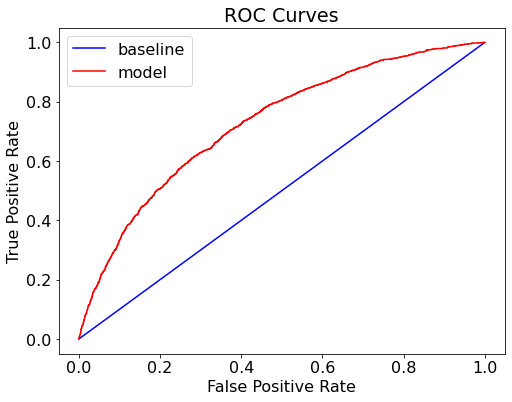

In [46]:
# plot the ROC AUC

def mod_eval(y_pred, probs,train_preds, prob_train):
    
    baseline = {}
    baseline['recall']=recall_score(y_test,[1 for _ in range(len(y_test))])
    baseline['precision'] = precision_score(y_test,[1 for _ in range(len(y_test))])
    baseline['roc'] = 0.5
    results = {}
    results['recall'] = recall_score(y_test, y_pred)
    results['precision'] = precision_score(y_test, y_pred)
    results['roc'] = roc_auc_score(y_test, probs)
    train_results = {}
    train_results['recall'] = recall_score(y_train, train_preds)
    train_results['precision'] = precision_score(y_train, train_preds)
    train_results['roc'] = roc_auc_score(y_train, prob_train)
    
    for metric in ['recall', 'precision', 'roc']:  
          print(f'{metric.capitalize()} Baseline: {round(baseline[metric], 2)} Test: {round(results[metric], 2)} Train: {round(train_results[metric], 2)}')
     
    # Calculate false positive rates and true positive rates
    base_fpr, base_tpr, _ = roc_curve(y_test, [1 for _ in range(len(y_test))])
    model_fpr, model_tpr, _ = roc_curve(y_test, probs)
    plt.figure(figsize = (8, 6))
    plt.rcParams['font.size'] = 16
    
    # Plot both curves
    plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
    plt.plot(model_fpr, model_tpr, 'r', label = 'model')
    plt.legend();
    plt.xlabel('False Positive Rate');
    plt.ylabel('True Positive Rate'); plt.title('ROC Curves');
    plt.show();

mod_eval(y_pred, probs, train_preds, prob_train)

### Confusion Matrix
A Confusion Matrix provides us with another metric to evaluate the quality of the output of our random forest classifier and makes use of some of the values we have already mentioned and calculated above. Diagonal elements represent correctly classified predictions (true negatives and positives) while the others are incorrecly classified (false negatives and positives). Here we can see a numerical representation of where the loss of performance of our model lies: a high number of false negatives (1558) and few true negatives (1):

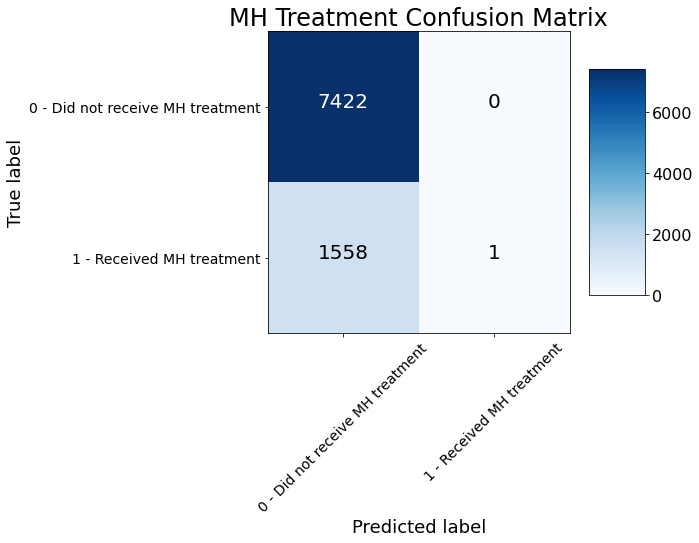

In [47]:
import itertools

def plot_confusion_matrix(cm, classes, normalize = False, title='Confusion matrix', cmap=plt.cm.Blues): 
    # plot parameters
    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    
    tick_marks = np.arange(len(classes))
    
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Plot labels
    for i, j in itertools.product(range(cm.shape[0]),   range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20, horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
        plt.grid(None)
        plt.tight_layout()
        plt.ylabel('True label', size = 18)
        plt.xlabel('Predicted label', size = 18)

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes = ['0 - Did not receive MH treatment', '1 - Received MH treatment'], title = 'MH Treatment Confusion Matrix')

### Feature Importance
Using the results of the classification model, we can assess the importance of the different features in the data set. The number of features as calculated here are more numerous than the number of predictor variables that were selected at the start of the analysis. This is due to the pipe function above which properly transformed the categorical data for each level as they were being inputed into the model algorithm. 

We can count the number of features and visualize the relative importance of each feature using the import_feat_ module of the random forest classifier:

In [49]:
feat_len = len(classr.feature_importances_)
print(" There are now ", feat_len, "features in the model")

 There are now  67 features in the model


The enc_bind function will encode and bind our expanded training data set into a dataframe for use in calculating the relative importance of each feature level:

In [50]:
def enc_bind(original_dataframe, enc_feat):
    dummies = pd.get_dummies(original_dataframe[enc_feat])
    res = pd.concat([dummies, original_dataframe], axis=1)
    res = res.drop(enc_feat, axis=1)
    return(res)

X_train_encoded = enc_bind(X_train, enc_feat)

We can now create and display an ordered rank of relative importance for each feature level numerically and graphically:

In [52]:
import_feat = list(zip(X_train_encoded, classr.feature_importances_))

# Then sort the feature importances by most important first
import_feat_ranked = sorted(import_feat, key = lambda x: x[1], reverse = True)

# Print out the feature and importances
[print('Feature: {:35} Importance: {}'.format(*pair)) for pair in import_feat_ranked];

Feature: NEWRACE2_1                          Importance: 0.1308779396907491
Feature: irsex_1                             Importance: 0.13060804165350132
Feature: irsex_2                             Importance: 0.11164958213337589
Feature: sexident_1                          Importance: 0.07601509331920872
Feature: illyr_1                             Importance: 0.04968456434444743
Feature: sexident_3                          Importance: 0.04917297794082869
Feature: illyr_0                             Importance: 0.04898329244747855
Feature: HEALTH2_1.0                         Importance: 0.036049456787577976
Feature: HEALTH2_4.0                         Importance: 0.028929807467501848
Feature: eduhighcat_4                        Importance: 0.027712332928209068
Feature: NEWRACE2_7                          Importance: 0.026950163333736933
Feature: NEWRACE2_2                          Importance: 0.0250075501482341
Feature: eduhighcat_2                        Importance: 0.020545702073056

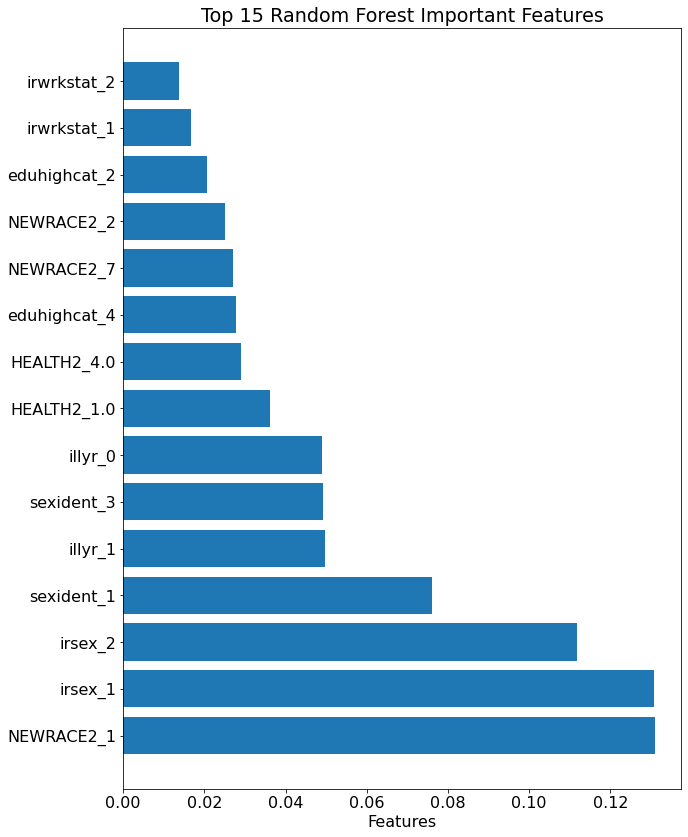

In [55]:
# Plot of Top 15 Feature Importance
top_15 = [i[0] for i in import_feat_ranked[:15]]
y_ticks = np.arange(0, len(top_15))
x_axis = [i[1] for i in import_feat_ranked[:15]]

plt.figure(figsize = (10, 14))
plt.barh(top_15, x_axis)   #horizontal barplot
plt.title('Top 15 Random Forest Important Features')
plt.xlabel('Features', fontdict= {'fontsize' : 16})
plt.show()

According to the results, the 10 most important features which contribute best to the predictive power of the model are:
* NEWRACE2_1: non-hispanic white
* irsex_1: Male
* irsex_2: Female
* sexident_1: Heterosexual
* illyr_1: used illicit drugs in the past year
* sexident_3: Bisexual
* illyr_0: did not use illicit drugs in the past year
* HEALTH2_1.0: Excellent health
* HEALTH2_4.0: Fair/poor health
* eduhighcat_4: College graduates

## Conclusion and Next Steps

### Feature Selection/Engineering
The important features identification process could be taken a step further to rebuild the model using the top 15 features and measure its effect on the accuracy of the new model's performance to compare it to the old one.

### Hyperparameter Tuning
The next step here would be to run a series of models while setting the parameters for the random forest classifier at random, each time recording the model performance by calculating the ROC AUC and accuracies as above. In addition, hyperparameter tuning helps to mitigate the tradeoff between bias and variance so as to minimize error and maximize goodness-of-fit. 